In [7]:
import numpy as np
from skimage.transform import resize 
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

# Load images
Unzip `sportsimages.zip` first.

In [8]:
dirname = os.path.join(os.getcwd(), 'flower_photos')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            image = resize(image, (21, 28), anti_aliasing=True, clip=False, preserve_range=True)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0] = dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\
d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\daisy 1
d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\dandelion 633
d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\roses 898
d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\sunflowers 641
d:\petir\Documents\GitHub\computer-vision-systems\Practica3_CNN_flowers\flower_photos\tulips 699
Directorios leidos: 5
Imagenes en cada directorio [634, 898, 641, 699, 798]
suma Total de imagenes en subdirs: 3670


# Create Labels

In [9]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  3670


In [10]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1


0 daisy
1 dandelion
2 roses
3 sunflowers
4 tulips


In [11]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


Create training sets, validation and preprocessing

In [12]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (2936, 21, 28, 3) (2936,)
Testing data shape :  (734, 21, 28, 3) (734,)


Text(0.5, 1.0, 'Ground Truth : 3')

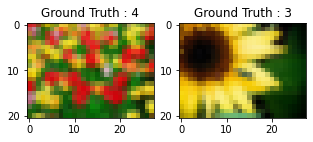

In [13]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

## Image Preprocessing


In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Network hot-encoding

In [15]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Training Set and validation

In [16]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [17]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)


(2348, 21, 28, 3) (588, 21, 28, 3) (2348, 5) (588, 5)


# Create CNN

In [46]:
# Parameters
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [47]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [48]:
sport_model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32)               

In [49]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])


# Training

In [50]:
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
37/37 [==============================] - 1s 26ms/step - loss: 1.6396 - accuracy: 0.2066 - val_loss: 1.5930 - val_accuracy: 0.2925
Epoch 2/20
37/37 [==============================] - 1s 23ms/step - loss: 1.6047 - accuracy: 0.2428 - val_loss: 1.5867 - val_accuracy: 0.3180
Epoch 3/20
37/37 [==============================] - 1s 22ms/step - loss: 1.5985 - accuracy: 0.2517 - val_loss: 1.5829 - val_accuracy: 0.3299
Epoch 4/20
37/37 [==============================] - 1s 21ms/step - loss: 1.5990 - accuracy: 0.2517 - val_loss: 1.5773 - val_accuracy: 0.3350
Epoch 5/20
37/37 [==============================] - 1s 21ms/step - loss: 1.5846 - accuracy: 0.2790 - val_loss: 1.5696 - val_accuracy: 0.3418
Epoch 6/20
37/37 [==============================] - 1s 21ms/step - loss: 1.5793 - accuracy: 0.2730 - val_loss: 1.5639 - val_accuracy: 0.3520
Epoch 7/20
37/37 [==============================] - 1s 23ms/step - loss: 1.5717 - accuracy: 0.3011 - val_loss: 1.5569 - val_accuracy: 0.3537
Epoch 8/20
37

In [51]:
sport_model.save("sports_mnist.h5py")


INFO:tensorflow:Assets written to: sports_mnist.h5py\assets


# Testing

In [52]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)


23/23 [==============================] - 0s 3ms/step - loss: 1.4669 - accuracy: 0.3692


In [54]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.4668508768081665
Test accuracy: 0.36920979619026184


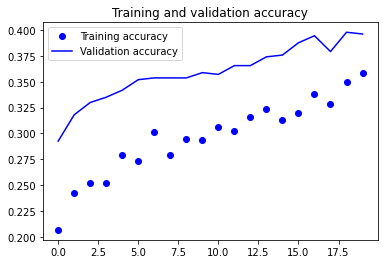

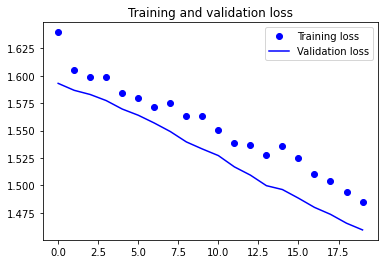

In [55]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
predicted_classes2 = sport_model.predict(test_X)
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)
predicted_classes.shape, test_Y.shape


((734,), (734,))

# Evaluation

Found 11059 correct labels


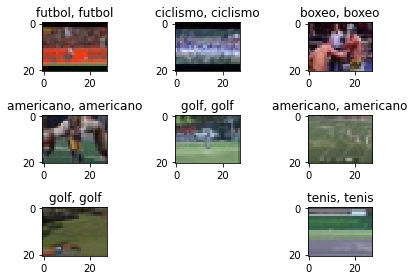

In [35]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 4367 incorrect labels


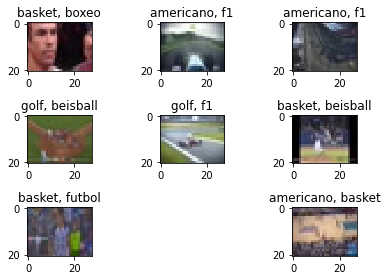

In [36]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [37]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.54      0.39      0.45      1845
     Class 1       0.63      0.81      0.71      1803
     Class 2       0.86      0.39      0.54      1560
     Class 3       0.74      0.80      0.77      1440
     Class 4       0.94      0.98      0.96      1569
     Class 5       0.85      0.16      0.26      1017
     Class 6       0.89      0.69      0.78      1469
     Class 7       0.48      0.89      0.62      1910
     Class 8       0.94      0.91      0.92      1012
     Class 9       0.89      1.00      0.94      1801

    accuracy                           0.72     15426
   macro avg       0.78      0.70      0.70     15426
weighted avg       0.76      0.72      0.70     15426



# Manual testing

In [39]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['test/f1_1.jpg', 'test/f1_2.jpg', 'test/soccer_1.jpg', 'test/box_1.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

test/f1_1.jpg golf
test/f1_2.jpg golf
test/soccer_1.jpg golf
test/box_1.jpg basket
